In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/attendancemarks/AttendanceMarksSA.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../input/attendancemarks/AttendanceMarksSA.csv')
df.head()

,Attendance,MSE,ESE
0,70,10,42
1,92,7,39
2,67,3,32
3,82,16,50
4,80,9,44


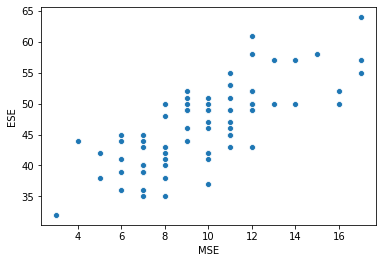

In [4]:
x = df['MSE']
y = df['ESE']
sns.scatterplot(x,y)

In [5]:
b0 = 0
b1 = 0
alpha = 0.01
count = 10000
n = float(len(x))

In [6]:
for i in range(count):
    y_bar = b1*x + b0
    b1 = b1 - (alpha/n)*sum(x*(y_bar-y))
    b0 = b0 - (alpha/n)*sum(y_bar-y)
        
print(b0,b1)

30.66113097444092 1.6326392534114609


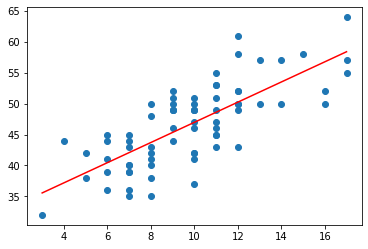

In [7]:
y_bar = b1*x + b0

plt.scatter(x,y)
plt.plot([min(x),max(x)],[min(y_bar),max(y_bar)],color='red') #regression line
plt.show()

In [8]:
import math
def RSE(y_true,y_predict):
    y_true = np.array(y_true)
    y_predict = np.array(y_predict)
    RSS = np.sum(np.square(y_true-y_predict))
    
    rse = math.sqrt(RSS/(len(y_true)-2))
    return rse

rse = RSE(df['ESE'],y_bar)
print(rse)

4.3962248281750655


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
X = np.array(df['MSE']).reshape(-1,1)
Y = np.array(df['ESE']).reshape(-1,1)

lr = LinearRegression()
lr.fit(X,Y)

print(lr.coef_)
print(lr.intercept_)

yp = lr.predict(X)
rse = RSE(Y,yp)

print(rse)

[[1.63215164]]
[30.66635246]
4.396224549647786
